In [ ]:
from google.colab import files
files.upload()

Saving kaggle.json to kaggle.json


{'kaggle.json': b'{"username":"shahidzain","key":"05e2a624bec713ff54b0e1f9a1167dad"}'}

In [ ]:
!mkdir -p ~/.kaggle
!cp kaggle.json ~/.kaggle/

!chmod 600 ~/.kaggle/kaggle.json

In [ ]:
!kaggle datasets download -d noulam/tomato

 98% 731M/743M [00:09<00:00, 57.1MB/s]
100% 743M/743M [00:09<00:00, 78.4MB/s]


In [ ]:
!unzip tomato.zip -d "/content/drive/MyDrive"

Streaming output truncated to the last 5000 lines.
  inflating: /content/drive/MyDrive/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac022a2b-764c-4507-8dd9-4470b75763e4___RS_HL 9937.JPG  
  inflating: /content/drive/MyDrive/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/ac249839-fe21-45cd-9e09-f0023fa7ee3a___GH_HL Leaf 273.JPG  
  inflating: /content/drive/MyDrive/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdbf632-8d26-472d-874f-6d7df5cd0432___RS_HL 9897.JPG  
  inflating: /content/drive/MyDrive/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acdf2283-0e7c-4ccd-8817-1019e3a8ed20___RS_HL 9943.JPG  
  inflating: /content/drive/MyDrive/new plant diseases dataset(augmented)/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy/acf28842-7821-4f31-ab73-2787e332e852___RS_HL 0

In [ ]:
!pip install tensorflow-gpu

     |████████████████████████████████| 320.4MB 49kB/s 


In [ ]:
from tensorflow.keras.layers import Input, Lambda, Dense, Flatten
from tensorflow.keras.models import Model
from tensorflow.keras.applications.inception_v3 import InceptionV3
from tensorflow.keras.preprocessing import image
from tensorflow.keras.preprocessing.image import ImageDataGenerator
from tensorflow.keras.models import Sequential

In [ ]:
from tensorflow.keras.applications.vgg19 import VGG19
SIZE = [224, 224]
vg19 = VGG19(input_shape=SIZE + [3], weights="imagenet", include_top=False)

80142336/80134624 [==============================] - 1s 0us/step


In [ ]:
for layer in vg19.layers:
    layer.trainable = False

In [ ]:
x = Flatten()(vg19.output)

In [ ]:
from glob import glob
folders = glob("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/*")
folders

['/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Bacterial_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Early_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Late_blight',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Leaf_Mold',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Septoria_leaf_spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Spider_mites Two-spotted_spider_mite',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Target_Spot',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_Yellow_Leaf_Curl_Virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___Tomato_mosaic_virus',
 '/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train/Tomato___healthy']

In [ ]:
prediction = Dense(len(folders), activation="softmax")(x)

modelvg = Model(inputs=vg19.input, outputs=prediction)

In [ ]:
modelvg.summary()

Model: "functional_3"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_1 (InputLayer)         [(None, 224, 224, 3)]     0         
_________________________________________________________________
block1_conv1 (Conv2D)        (None, 224, 224, 64)      1792      
_________________________________________________________________
block1_conv2 (Conv2D)        (None, 224, 224, 64)      36928     
_________________________________________________________________
block1_pool (MaxPooling2D)   (None, 112, 112, 64)      0         
_________________________________________________________________
block2_conv1 (Conv2D)        (None, 112, 112, 128)     73856     
_________________________________________________________________
block2_conv2 (Conv2D)        (None, 112, 112, 128)     147584    
_________________________________________________________________
block2_pool (MaxPooling2D)   (None, 56, 56, 128)      

In [ ]:
modelvg.compile(loss="categorical_crossentropy", metrics=["accuracy"], optimizer="adam")

In [ ]:
train_datagen_vg19 = ImageDataGenerator(rescale=1./255,
                                  shear_range=0.2,
                                  zoom_range=0.2,
                                  horizontal_flip=True)

test_datagen_vg19 = ImageDataGenerator(rescale=1./255)

In [ ]:
trainning_set_vg19 = train_datagen_vg19.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/train',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 18345 images belonging to 10 classes.


In [ ]:
testing_set_vg19 = test_datagen_vg19.flow_from_directory('/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/valid',
                                                 target_size=(224, 224),
                                                 batch_size=32,
                                                 class_mode="categorical")

Found 4585 images belonging to 10 classes.


In [29]:
r_vg19 = modelvg.fit_generator(trainning_set_vg19,
                       validation_data=testing_set_vg19,
                       epochs=30,
                       steps_per_epoch=len(trainning_set_vg19),
                       validation_steps=len(testing_set_vg19)
                       )

Instructions for updating:
Please use Model.fit, which supports generators.
Epoch 1/30
574/574 [==============================] - 292s 509ms/step - loss: 0.8265 - accuracy: 0.7267 - val_loss: 0.5112 - val_accuracy: 0.8238
Epoch 2/30
574/574 [==============================] - 290s 506ms/step - loss: 0.4810 - accuracy: 0.8382 - val_loss: 0.4551 - val_accuracy: 0.8462
Epoch 3/30
574/574 [==============================] - 283s 493ms/step - loss: 0.4156 - accuracy: 0.8614 - val_loss: 0.4594 - val_accuracy: 0.8515
Epoch 4/30
574/574 [==============================] - 280s 487ms/step - loss: 0.3331 - accuracy: 0.8867 - val_loss: 0.3883 - val_accuracy: 0.8726
Epoch 5/30
574/574 [==============================] - 280s 487ms/step - loss: 0.3378 - accuracy: 0.8862 - val_loss: 0.3137 - val_accuracy: 0.8992
Epoch 6/30
574/574 [==============================] - 277s 483ms/step - loss: 0.3230 - accuracy: 0.8967 - val_loss: 0.4293 - val_accuracy: 0.8748
Epoch 7/30
574/574 [============================

In [30]:
modelvg.save("vgg_19tl.model")

Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
Instructions for updating:
This property should not be used in TensorFlow 2.0, as updates are applied automatically.
INFO:tensorflow:Assets written to: vgg_19tl.model/assets


In [31]:
modelvg.save("/content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/vgg_19tl.model")

INFO:tensorflow:Assets written to: /content/drive/MyDrive/New Plant Diseases Dataset(Augmented)/vgg_19tl.model/assets


In [1]:
import tensorflow as tf
model = tf.keras.models.load_model("vgg_19tl.model")

In [2]:
import cv2
def prepare(filepath):
    img_array = cv2.imread(filepath, cv2.IMREAD_COLOR)
    img_array = img_array / 255
    new_array = cv2.resize(img_array, (224, 224))
    return new_array.reshape(-1, 224, 224, 3)

Text(0.5, 1.0, 'Bacterial Spot')

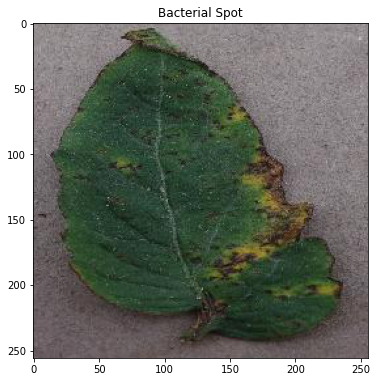

In [5]:
import matplotlib.pyplot as plt
plt.figure(figsize=(6,9))
plt.imshow(plt.imread("tomato_dataset/valid/Tomato___Bacterial_spot/0afe3bbd-b18b-4c70-8fbd-072844e742a2___GCREC_Bact.Sp 3434.JPG"))
plt.title("Bacterial Spot")

In [6]:
import numpy as np
prediction = model.predict([prepare("tomato_dataset/valid/Tomato___Bacterial_spot/0afe3bbd-b18b-4c70-8fbd-072844e742a2___GCREC_Bact.Sp 3434.JPG")])
np.argmax(prediction)

0

In [7]:
if np.argmax(prediction) == 0:
    print("Bacterial_spot")
elif np.argmax(prediction) == 1:
    print("Early_Blight")
elif np.argmax(prediction) == 2:
    print("Late Blight")
elif np.argmax(prediction) == 3:
    print("Leaf Mold")
elif np.argmax(prediction) == 4:
    print("Septoria Leaf Mold")
elif np.argmax(prediction) == 5:
    print("Spider mites")
elif np.argmax(prediction) == 6:
    print("Target Spot")
elif np.argmax(prediction) == 7:
    print("Yellow Leaf Curl Virus")
elif np.argmax(prediction) == 8:
    print("Mosaic Virus")
else:
    print("Healthy")

Bacterial_spot


Text(0.5, 1.0, 'Early_blight')

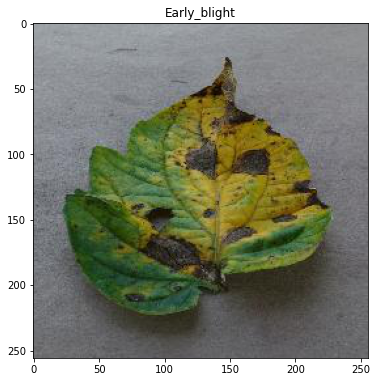

In [8]:
plt.figure(figsize=(6,9))
plt.imshow(plt.imread("tomato_dataset/valid/Tomato___Early_blight/0f03a09c-aa48-4d51-95e1-752c466c3742___RS_Erly.B 6413.JPG"))
plt.title("Early_blight")

In [9]:
def predict_result(img):
    prediction=model.predict([prepare(f"tomato_dataset/valid/{img}")])
    plt.figure(figsize=(6,9))
    plt.imshow(plt.imread(f"tomato_dataset/valid/{img}"))
    if np.argmax(prediction)==0:
        print("DISEASE  :  Bacteria Spot\n\nThe best way to treat suspected bacterial infections is to cut out all infected plant parts in order to prevent further spread. You can also use a bactericide in the early stages of the disease. Certain bacterial infections (such as wilts) can be transmitted by insects as they bite and feed on plant tissue.")
    elif np.argmax(prediction) == 1:
        print("DISEASE  :  Early_Blight\n\nTreatment. Tomatoes that have early blight require immediate attention before the disease takes over the plants. Thoroughly spray the plant (bottoms of leaves also) with Bonide Liquid Copper Fungicide concentrate or Bonide Tomato & Vegetable. Both of these treatments are organic.")
    elif np.argmax(prediction) == 2:
        print("DISEASE  :  Late Blight\n\nPull the Late Blight Infected Plants: Pull and remove infected plants, bag up the foliage and unripe tomatoes into black trash bags, and disposed it along with the household trash. Prevent Overwintering Late Blight: Late blight can only survive on living tissue.")
    elif np.argmax(prediction) == 3:
        print("DISEASE  :  Leaf Mold\n\nCombine one tablespoon baking soda and one-half teaspoon of liquid, non-detergent soap with one gallon of water, and spray the mixture liberally on the plants. Mouthwash. The mouthwash you may use on a daily basis for killing the germs in your mouth can also be effective at killing powdery mildew spores.")
    elif np.argmax(prediction) == 4:
        print("DISEASE  :  Septoria Leaf Mold\n\nRemoving infected leaves. Remove infected leaves immediately, and be sure to wash your hands thoroughly before working with uninfected plants. Consider organic fungicide options. Consider chemical fungicides.")
    elif np.argmax(prediction) == 5:
        print("DISEASE  :  Spider mites\n\nTo treat a plant for spider mites, the first step is to hose the plant down under the sink or shower faucet, dislodging the bugs.Follow this with an insecticide, such as neem oil.For serious infestations that are undeterred by neem oil, insecticidal soap is a stronger treatment option.")
    elif np.argmax(prediction) == 6:
        print("DISEASE  :  Target Spot\n\nThe following tips for treating target spot on tomatoes should help: Remove old plant debris at the end of the growing season; otherwise, the spores will travel from debris to newly planted tomatoes in the following growing season, thus beginning the disease anew.")
    elif np.argmax(prediction) == 7:
        print("DISEASE  :  Yellow Leaf Curl Virus\n\nOnce infected with the virus, there are no treatments against the infection. Control the whitefly population to avoid the infection with the virus. Insecticides of the family of the pyrethroids used as soil drenches or spray during the seedling stage can reduce the population of whiteflies")
    elif np.argmax(prediction) == 8:
        print("DISEASE  :  Mosaic Virus\n\nFungicides will NOT treat this viral disease.Plant resistant varieties when available or purchase transplants from a reputable source.Do NOT save seed from infected crops.")
    else:
        print("Healthy")


DISEASE  :  Early_Blight

Treatment. Tomatoes that have early blight require immediate attention before the disease takes over the plants. Thoroughly spray the plant (bottoms of leaves also) with Bonide Liquid Copper Fungicide concentrate or Bonide Tomato & Vegetable. Both of these treatments are organic.


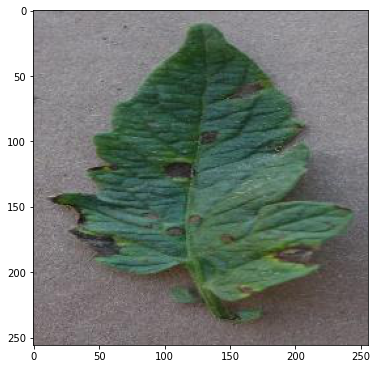

In [16]:
predict_result("1.JPG")